# Import library

In [1]:
import pandas as pd
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import container
import seaborn as sns
import glob
import json
from matplotlib.colors import LogNorm
import copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import rc




## Load configuration

In [2]:
"""Load configuration"""
with open("/home/trduong/Data/counterfactual_fairness_game_theoric/configuration.yml", 'r') as stream:
    try:
        conf = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print("Pass")

## Setup function

In [14]:
def latexify(fig_width=None, fig_height=None, columns=1, largeFonts=False, font_scale=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 3.39 if columns == 1 else 6.9  # width in inches

    if fig_height is None:
        golden_mean = (np.sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 60.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'axes.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'axes.titlesize': font_scale * 10 if largeFonts else font_scale * 7,
              'font.size': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'legend.fontsize': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'xtick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'ytick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'figure.figsize': [fig_width, fig_height],
              'xtick.minor.size': 0.5,
              'xtick.major.pad': 1.5,
              'xtick.major.size': 1,
              'ytick.minor.size': 0.5,
              'ytick.major.pad': 1.5,
              'ytick.major.size': 1,
              'lines.linewidth': 1.5,
              'lines.markersize': 0.1,
              'hatch.linewidth': 0.5
              }
    matplotlib.rcParams.update(params)
    plt.rcParams.update(params)

# Law dataset

In [ ]:
epoch = 400
lr = 0.01 
lamb = 100
state = 0 

df = []

arr = [0.001, 0.01, 0.1, 1]

for lamb in arr:
    df_term = pd.read_csv(conf['evaluate_compas_lamba'].format(epoch, lamb, lr, state))
    df_term['lambda'] = lamb
    df.append(df_term)

df = pd.concat(df)

# Compas dataset

In [83]:
epoch = 400
lr = 0.01 
lamb = 100
state = 0 

df = []

arr = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rstates = [0, 1, 2, 3]
for state in rstates:
    for lamb in arr:
        df_term = pd.read_csv(conf['evaluate_compas_lamba'].format(epoch, lamb, lr, state))
        df_term['lambda'] = lamb
        df.append(df_term)

df = pd.concat(df)

In [84]:
df

,method,Accuracy,F1 Score,Precision,Recall,average_abs_odds_difference_race,balanced_acc,coefficient_of_variation,energy,equal_opportunity_difference_race,gaussian,generalized_entropy_index_race,laplacian,sinkhorn,smoothed_empirical_differential_fairness,theil_index,true_positive_rate_difference_race,lambda
0,full,0.668053,0.664174,0.667813,0.668053,0.117816,0.659984,0.872735,0.011157,0.152604,0.009892,0.190417,0.012523,0.003754,0.251347,0.270046,0.152604,0.001
1,unaware,0.669439,0.665467,0.669320,0.669439,0.124964,0.661267,0.871908,0.012547,0.160097,0.011126,0.190056,0.014108,0.004182,0.251347,0.269755,0.160097,0.001
2,cf1,0.621622,0.599326,0.630610,0.621622,0.085809,0.603418,1.026147,0.002755,0.092727,0.001761,0.263244,0.003918,0.000718,0.251347,0.375857,0.092727,0.001
3,cf2,0.618157,0.606735,0.618514,0.618157,0.094246,0.604989,0.984906,0.002200,0.092580,0.001607,0.242510,0.002920,0.000577,0.251347,0.342098,0.092580,0.001
4,AL_prediction,0.683299,0.682126,0.682414,0.683299,0.158424,0.678662,0.821282,0.018301,0.178254,0.017052,0.168626,0.019747,0.006174,0.251347,0.236688,0.178254,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,cf1,0.621622,0.599326,0.630610,0.621622,0.085809,0.603418,1.026147,0.002755,0.092727,0.001761,0.263244,0.003918,0.000718,0.251347,0.375857,0.092727,100.000
3,cf2,0.618157,0.606735,0.618514,0.618157,0.094246,0.604989,0.984906,0.002200,0.092580,0.001607,0.242510,0.002920,0.000577,0.251347,0.342098,0.092580,100.000
4,AL_prediction,0.683299,0.682126,0.682414,0.683299,0.158424,0.678662,0.821282,0.018300,0.178254,0.017052,0.168626,0.019746,0.006174,0.251347,0.236688,0.178254,100.000
5,GL_prediction,0.680527,0.679142,0.679609,0.680527,0.108856,0.675539,0.828066,0.012275,0.130350,0.011283,0.171423,0.013354,0.004451,0.251347,0.240877,0.130350,100.000


In [85]:
# df.groupby('method').mean()

In [86]:
df = df[df['method'] == 'GD_prediction']

In [87]:
df

,method,Accuracy,F1 Score,Precision,Recall,average_abs_odds_difference_race,balanced_acc,coefficient_of_variation,energy,equal_opportunity_difference_race,gaussian,generalized_entropy_index_race,laplacian,sinkhorn,smoothed_empirical_differential_fairness,theil_index,true_positive_rate_difference_race,lambda
6,GD_prediction,0.670825,0.670689,0.670584,0.670825,0.108720,0.668332,0.815314,0.025556,0.133781,0.022132,0.166184,0.022324,0.016091,0.251347,0.230763,0.133781,0.001
6,GD_prediction,0.676369,0.676487,0.676637,0.676369,0.114787,0.674689,0.800613,0.023162,0.134266,0.020303,0.160245,0.020195,0.014540,0.251347,0.221748,0.134266,0.010
6,GD_prediction,0.672904,0.673387,0.675008,0.672904,0.119688,0.673147,0.784928,0.025633,0.135609,0.022736,0.154028,0.022289,0.015613,0.251347,0.211227,0.135609,0.100
6,GD_prediction,0.674983,0.674765,0.674625,0.674983,0.111789,0.672294,0.812368,0.025080,0.128376,0.021539,0.164985,0.021971,0.015853,0.251347,0.229343,0.128376,1.000
6,GD_prediction,0.670825,0.669986,0.669940,0.670825,0.111049,0.666775,0.830814,0.021680,0.134526,0.018999,0.172563,0.019031,0.013745,0.251347,0.241163,0.134526,10.000
6,GD_prediction,0.673597,0.673462,0.673359,0.673597,0.106716,0.671121,0.811874,0.024317,0.122970,0.021145,0.164785,0.021214,0.015257,0.251347,0.228832,0.122970,20.000
6,GD_prediction,0.673597,0.673502,0.673423,0.673597,0.108791,0.671232,0.810759,0.024250,0.125058,0.020976,0.164333,0.021287,0.015384,0.251347,0.228093,0.125058,30.000
6,GD_prediction,0.674290,0.674680,0.679869,0.674290,0.133970,0.676988,0.757545,0.026310,0.153653,0.023398,0.143469,0.022796,0.016680,0.251347,0.194164,0.153653,40.000
6,GD_prediction,0.677062,0.677555,0.679423,0.677062,0.126607,0.677554,0.777610,0.024601,0.146048,0.022019,0.151169,0.021215,0.015456,0.251347,0.206962,0.146048,50.000
6,GD_prediction,0.674290,0.674424,0.674600,0.674290,0.103864,0.672652,0.802619,0.025092,0.124685,0.021284,0.161049,0.022302,0.015913,0.251347,0.222813,0.124685,60.000


## Visualize line chart with different lambda

In [88]:
df['coefficient_of_variation'].min()

0.7575452359232053

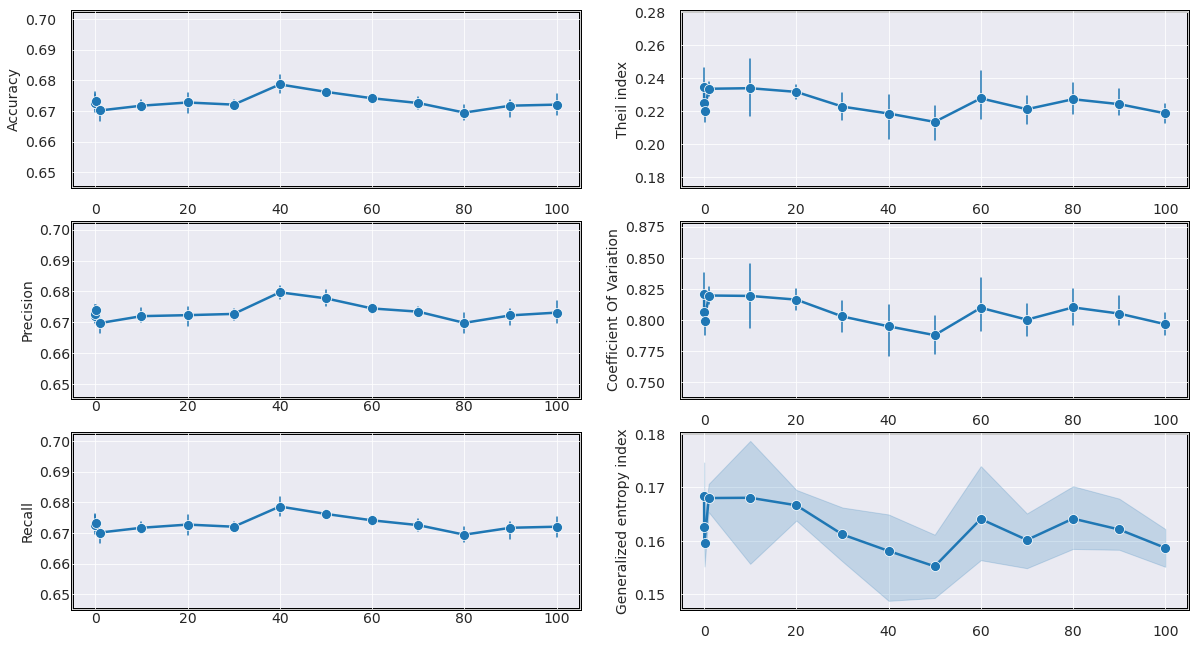

In [99]:
"""Plot 1"""
latexify(20,11, font_scale=2)
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")
rc('font',**{'family':'serif', 'serif': ['Arial Black']})
fig, axes = plt.subplots(nrows=3, ncols=2)

value = 0.02

"""Plot 1"""
xvalue = "lambda"
yvalue = "Accuracy"
ax_plt = sns.lineplot(data=df, x=xvalue, y=yvalue, 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      err_style="bars",
                      ax=axes[0,0])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Accuracy")
ax_plt.xaxis.labelpad = 20
ax_plt.tick_params(pad=15)
# ax_plt.yaxis.set_major_locator(MultipleLocator(0.02))
# ax_plt.grid(color='#CCCCCC', linestyle='-', linewidth=1.2)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))

"""Plot 2"""
xvalue = "lambda"
yvalue = "Precision"
ax_plt = sns.lineplot(data=df, x=xvalue, y=yvalue, 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      err_style="bars",
                      ax=axes[1,0])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Precision")
ax_plt.xaxis.labelpad = 20
# ax_plt.tick_params(pad=15)
# ax_plt.yaxis.set_major_locator(MultipleLocator(0.02))
# ax_plt.grid(color='#CCCCCC', linestyle='-', linewidth=1.2)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))

"""Plot 3"""
xvalue = "lambda"
yvalue = "Recall"
ax_plt = sns.lineplot(data=df, x=xvalue, y=yvalue, 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      err_style="bars",
                      ax=axes[2,0])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Recall")
ax_plt.xaxis.labelpad = 20
# ax_plt.tick_params(pad=15)
# ax_plt.yaxis.set_major_locator(MultipleLocator(0.02))
# ax_plt.grid(color='#CCCCCC', linestyle='-', linewidth=1.2)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))

"""Plot 4"""
xvalue = "lambda"
yvalue = "theil_index"
ax_plt = sns.lineplot(data=df, x=xvalue, y=yvalue, 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      err_style="bars",
                      ax=axes[0,1])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Theil index")
ax_plt.xaxis.labelpad = 20
ax_plt.tick_params(pad=15)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))

"""Plot 5"""
xvalue = "lambda"
yvalue = "coefficient_of_variation"
ax_plt = sns.lineplot(data=df, x=xvalue, y=yvalue, 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      err_style="bars",
                      ax=axes[1,1])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Coefficient Of Variation")
ax_plt.xaxis.labelpad = 20
ax_plt.tick_params(pad=15)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))

"""Plot 6"""
xvalue = "lambda"
yvalue = "generalized_entropy_index_race"
ax_plt = sns.lineplot(data=df, x="lambda", y="generalized_entropy_index_race", 
                      linewidth = 2.5,
                      marker='o',
                      markersize=10,
                      #err_style="bars",
                      ax=axes[2,1])
ax_plt.set(xlabel=None)
ax_plt.set(ylabel="Generalized entropy index")
ax_plt.xaxis.labelpad = 20
ax_plt.tick_params(pad=15)
ax_plt.patch.set_edgecolor('black')  
ax_plt.patch.set_linewidth('3')
# ax_plt.set(ylim=(df[yvalue].min() - value, df[yvalue].max() + value))